In [ ]:
from google.colab import drive #connect colab to drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np #for mathemathical stuff
import matplotlib.pyplot as plt #for plotting
import pandas as pd #import, manage datasets....as dataframes and series



In [ ]:
dataset= pd.read_csv('/content/drive/My Drive/Data.csv') #reading data from drive
print(dataset) #printing the dataset(dataframe)


   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
x = dataset.iloc[:, :-1].values #independent var x- containg all rows and all cols-all except last col
y = dataset.iloc[:, 3].values #dependent var y- containing allrows and 3rd col ie purchased indexing frm 0

In [ ]:
from sklearn.impute import SimpleImputer 
#sklearn- lib
#simpleimputer- 
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer = imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
pip install -U scikit-learn==0.20 #help with hotencoding

Requirement already up-to-date: scikit-learn==0.20 in /usr/local/lib/python3.6/dist-packages (0.20.0)


In [ ]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_x = LabelEncoder()
x[:, 0] = labelencoder_x.fit_transform(x[:, 0])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(x).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
# FOR CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder 

# France, Spain, Germany == 0,1,2
labelencoder_x = LabelEncoder()
# 0th row == Country 
x[:, 0] = labelencoder_x.fit_transform(x[:, 0])
print(x)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 4.40000000e+01
  7.20000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+01
  5.40000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.80000000e+01
  6.10000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.37777778e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  5.80000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.87777778e+01
  5.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.80000000e+01
  7.90000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.00000000e+01
  8.30000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


In [ ]:
print(x_train)
print(x_test)

[[-1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [ 1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-1.         -0.37796447  1.29099445  0.05261351 -1.11141978]
 [ 1.         -0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-1.         -0.37796447  1.29099445 -0.0813118  -0.16751412]
 [ 1.         -0.37796447 -0.77459667  0.95182631  0.98614835]
 [ 1.         -0.37796447 -0.77459667 -0.59788085 -0.48214934]]
[[-1.          2.64575131 -0.77459667 -1.45882927 -0.90166297]
 [-1.          2.64575131 -0.77459667  1.98496442  2.13981082]]


Linear Regression

In [ ]:
# Importing the dataset
dataset = pd.read_csv('drive/My Drive/Salary_Data.csv')
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [ ]:
x = dataset.iloc[:, :-1].values #independent var x- containg all rows and all cols-all except last col
y = dataset.iloc[:, 1].values #dependent var y- containing allrows and 3rd col ie purchased indexing frm 0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #creating object regressor
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

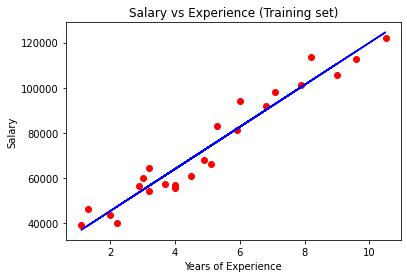

In [ ]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

MULTIPLE REGRESSION

In [ ]:
# Importing the dataset
dataset = pd.read_csv('drive/My Drive/50_Startups.csv')
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

#ONE HOT ENCODER ADDS EXTRA COLUMN !! 
# 1,2,3- NEW YORK, CALIFORNIA,FLORIDA
## ONE HOT ENCODER- I SPLITTED MY CATEGORICAL DATA TO 3 COLS - L,M,N
# l m n ( AT A TIME ONLY ONE VAR  WILL BE 1 )
# 0 1 0 (m is 1)
# 1 0 0(l is 1)
# 0 0 1(n is 1)


#THEN MY MULTIPLE LINEAR REGRESSION BECOMES
#y= ax + bl + cm + dn + const

##IF WE PASS 1ST ROW, 2ND ROW, 3RD ROW WE GET
#y = ax + 0 + m +0 const (010)
#y = ax + l + 0 + 0+const (100)
#y = ax + 0 + 0 + n +const (001)

#change this eqn to 2var- l and m.. from 3 var
#y = ax + 0+ m + const (m is one)
#y = ax + l + 0 + const (l is one)
#y = ax + 0 + 0 + const( n is one but we have removed 3rd var, so when both m and l is 0 it means n is 1)

state column becomes new york and 2 extra cols gets added
new york| california | florida
        |            |        
        |            |

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
print(X)


[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

In [ ]:
# Avoiding the Dummy Variable Trap.  
X = X[:, 1:]
print(X)

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 [0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]
 [0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04 3.6286136e+05]
 [0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05]
 [1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05]
 [0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05]
 [0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05]
 [1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05 2.2916095e+05]
 [0.0000000e+00 0.0000000e+00 1.0067196e+05 9.1790610e+04 2.4974455e+05]
 [1.0000000e+00 0.0000000e+00 9.3863750e+04 1.2732038e+05 2.4983944e+05]
 [0.0000000e+00 0.0000000e+00 9.1992390e+04 1.35495

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

9137.990152791011
